# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Glory Indah Situmorang
- **Email:** gloryindahsitumorang@gmailcom
- **ID Dicoding:** glory_indah

## Menentukan Pertanyaan Bisnis

- Berapa jumlah sewa sepeda  bila ditinjau berdasarkan faktor musim dan lingkungan (cuaca,suhu,suhu terasa) ?
- Bagaimana kolerasi antara jumlah sepeda sewaan dengan suhu, kelembaban dan kecepatan angin?
- Bagaimana tingkat jumlah penyewa sepeda pada setiap bulannya selama dua tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/gloryindahs/bike-sharing/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai tabel **day_df**

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [5]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore day_df

In [6]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
702,703,2012-12-03,4,1,12,0,1,1,1,0.4525,0.455796,0.767500,0.082721,555,5679,6234
565,566,2012-07-19,3,1,7,0,4,1,1,0.7700,0.714642,0.600417,0.165429,888,5703,6591
384,385,2012-01-20,1,1,1,0,5,1,2,0.2175,0.220958,0.450000,0.202750,115,3048,3163
513,514,2012-05-28,2,1,5,1,1,0,1,0.7125,0.679300,0.676250,0.196521,2557,3486,6043
536,537,2012-06-20,2,1,6,0,3,1,1,0.7825,0.720975,0.592083,0.113812,872,5339,6211


In [7]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [48]:
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_data = day_df.groupby(by="season").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)
season_data['season'] = season_data['season'].map(season_mapping)
print(season_data)

     season          cnt
0      Fall  5644.303191
1    Summer  4992.331522
2    Winter  4728.162921
3  Springer  2604.132597


<ipython-input-48-5f8fb9b243a2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_data = day_df.groupby(by="season").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


In [50]:
weathersit_mapping = {1: 'Few clouds', 2: 'Mist', 3: 'Light Snow', 4: 'Snow + Fog'}
weathersit_data = day_df.groupby(by="weathersit").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)
weathersit_data ['weathersit'] = weathersit_data ['weathersit'].map(weathersit_mapping)
print(weathersit_data )

   weathersit          cnt
0  Few clouds  4876.786177
1        Mist  4035.862348
2  Light Snow  1803.285714


<ipython-input-50-642341272f61>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weathersit_data = day_df.groupby(by="weathersit").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


In [10]:
day_df.groupby(by="temp").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)

<ipython-input-10-72d672ab8185>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_df.groupby(by="temp").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


,temp,cnt
0,0.601667,8362.0
1,0.600000,8294.0
2,0.610000,8227.0
3,0.633333,8009.0
4,0.529167,7907.0
...,...,...
494,0.216667,683.0
495,0.389091,623.0
496,0.376522,605.0
497,0.195000,431.0


In [11]:
day_df.groupby(by="atemp").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)

<ipython-input-11-fb4e0e38930f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_df.groupby(by="atemp").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


,atemp,cnt
0,0.585867,8714.0
1,0.530296,8555.0
2,0.610488,8395.0
3,0.570067,8362.0
4,0.566908,8294.0
...,...,...
685,0.366252,605.0
686,0.203600,506.0
687,0.220333,441.0
688,0.219700,431.0


In [57]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weekday_data = day_df.groupby(by="weekday").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)
weekday_data['weekday'] = weekday_data['weekday'].map(weekday_mapping)
print(weekday_data)

     weekday          cnt
0     Friday  4690.288462
1   Thursday  4667.259615
2   Saturday  4550.542857
3  Wednesday  4548.538462
4    Tuesday  4510.663462
5     Monday  4338.123810
6     Sunday  4228.828571


<ipython-input-57-6e97997dbe9d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_data = day_df.groupby(by="weekday").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


In [55]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_data = day_df.groupby(by="mnth").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)
month_data['mnth'] = month_data['mnth'].map(month_mapping)
print(month_data)

         mnth          cnt
0        June  5772.366667
1   September  5766.516667
2      August  5664.419355
3        July  5563.677419
4         May  5349.774194
5     October  5199.225806
6       April  4484.900000
7    November  4247.183333
8       March  3692.258065
9    December  3403.806452
10   February  2655.298246
11    January  2176.338710


<ipython-input-55-b6762513197f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_data = day_df.groupby(by="mnth").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


In [62]:
year_mapping = {0:'one year', 1: 'two year'}
year_data = day_df.groupby(by="yr").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)
year_data['yr'] = year_data['yr'].map(year_mapping)
print(year_data)

         yr          cnt
0  two year  5599.934426
1  one year  3405.761644


<ipython-input-62-34d2e0996726>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_data = day_df.groupby(by="yr").mean()['cnt'].sort_values(ascending=False).reset_index(drop=False)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah sewa sepeda  bila ditinjau berdasarkan faktor musim dan lingkungan (cuaca,suhu,suhu terasa) ?

<ipython-input-49-80a2bf6345ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data = season_data, palette="Blues_d")


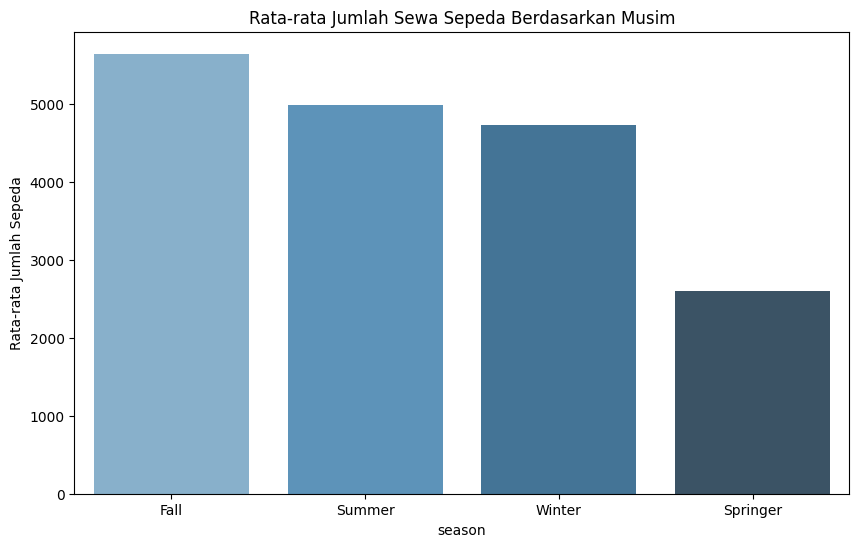

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data = season_data, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Musim')
plt.xlabel('season')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

<ipython-input-34-e8e1a6316edc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=result_df, palette="Blues_d")


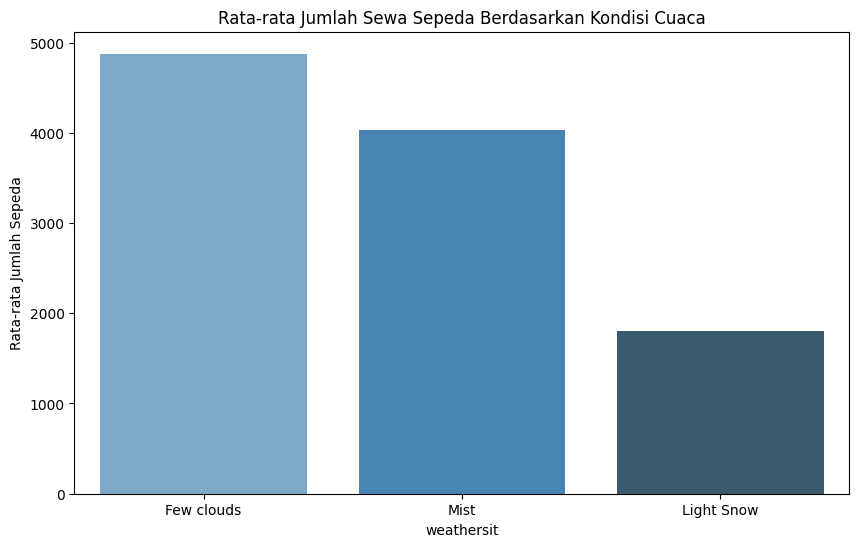

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=result_df, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('weathersit')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

<ipython-input-35-2f5b93f2bf2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp', y='cnt', data=sample_df, palette="Blues_d")


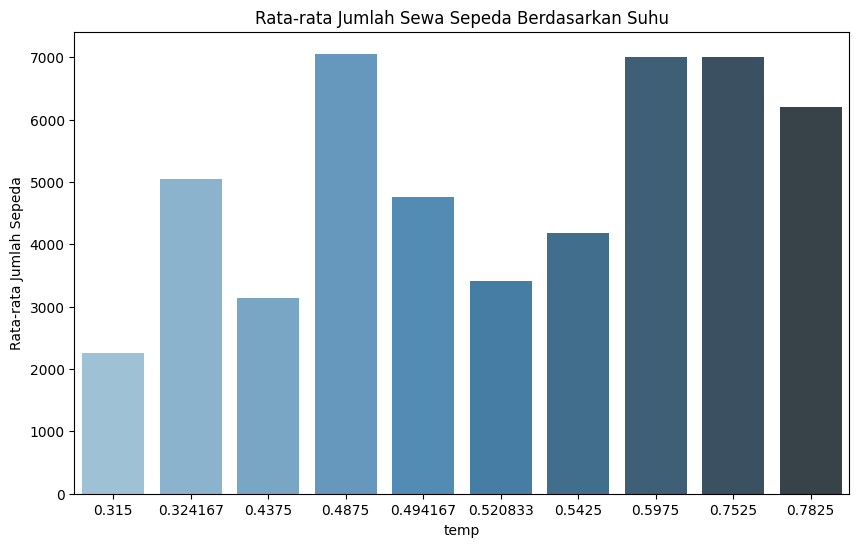

In [35]:
sample_df = day_df.sample(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='cnt', data=sample_df, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Suhu')
plt.xlabel('temp')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

<ipython-input-36-ef22053f9950>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='atemp', y='cnt', data=sample_df, palette="Blues_d")


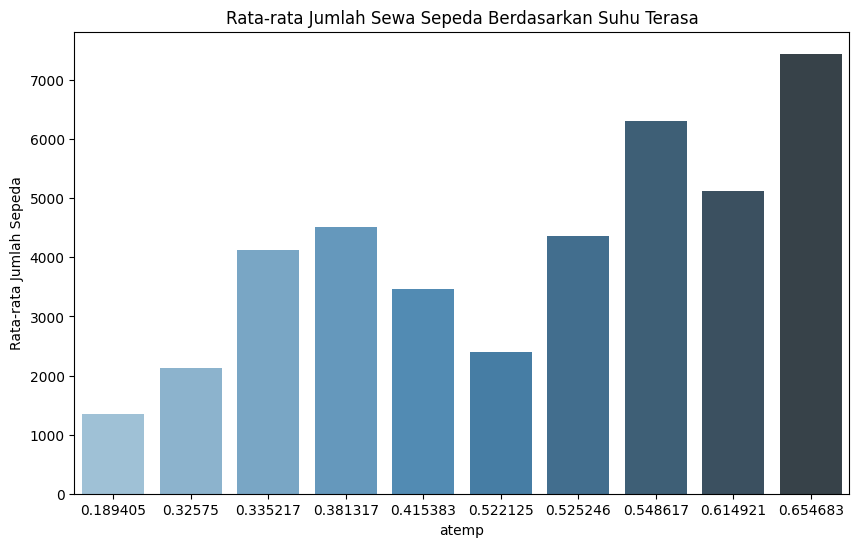

In [36]:
sample_df = day_df.sample(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='atemp', y='cnt', data=sample_df, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Suhu Terasa')
plt.xlabel('atemp')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana kolerasi antara jumlah sepeda sewaan dengan suhu, kelembaban dan kecepatan angin?

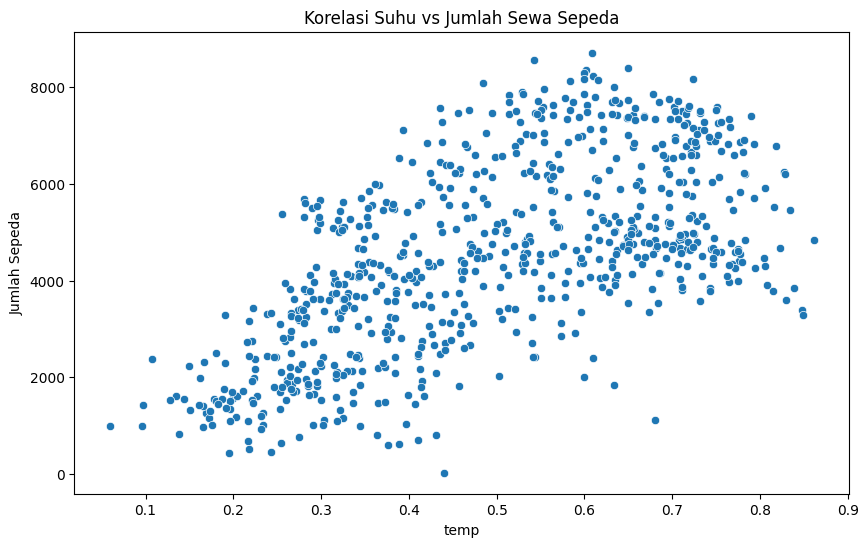

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Korelasi Suhu vs Jumlah Sewa Sepeda')
plt.xlabel('temp')
plt.ylabel('Jumlah Sepeda')
plt.show()

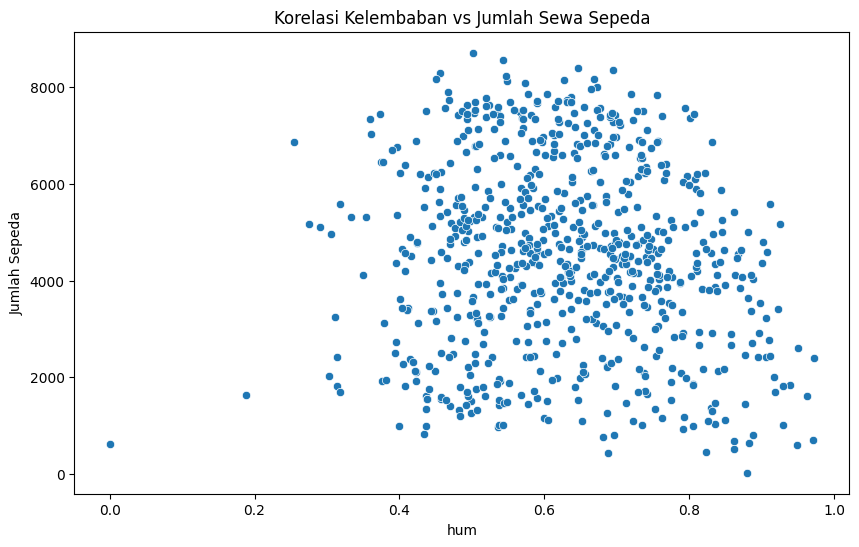

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Korelasi Kelembaban vs Jumlah Sewa Sepeda')
plt.xlabel('hum')
plt.ylabel('Jumlah Sepeda')
plt.show()

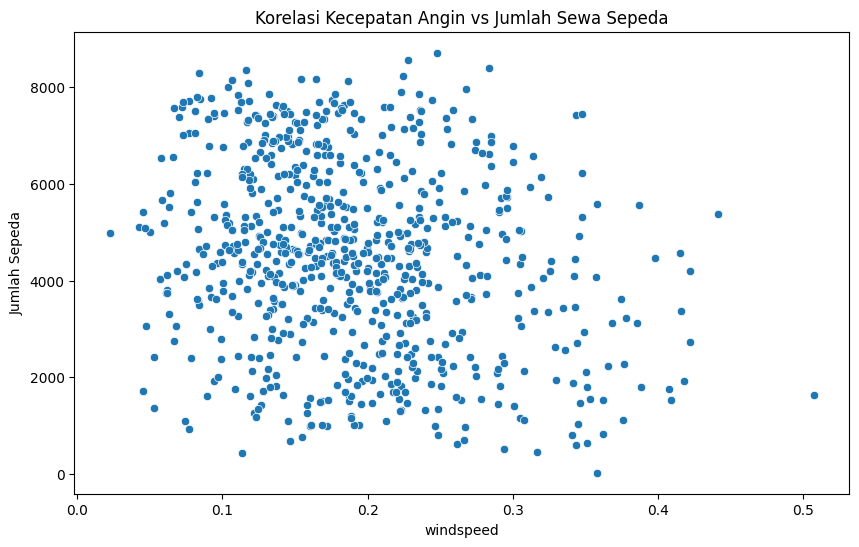

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Korelasi Kecepatan Angin vs Jumlah Sewa Sepeda')
plt.xlabel('windspeed')
plt.ylabel('Jumlah Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana tingkat jumlah penyewa sepeda pada setiap bulannya selama dua tahun?

<ipython-input-63-0cfa8871c24a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data = weekday_data, palette="Blues_d")


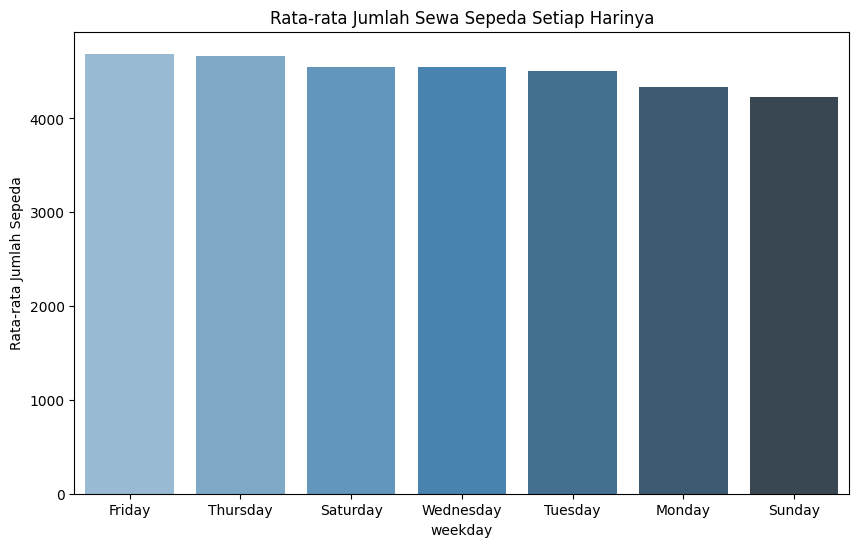

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data = weekday_data, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Setiap Harinya')
plt.xlabel('weekday')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

<ipython-input-65-4ba982d38398>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data = month_data, palette="Blues_d")


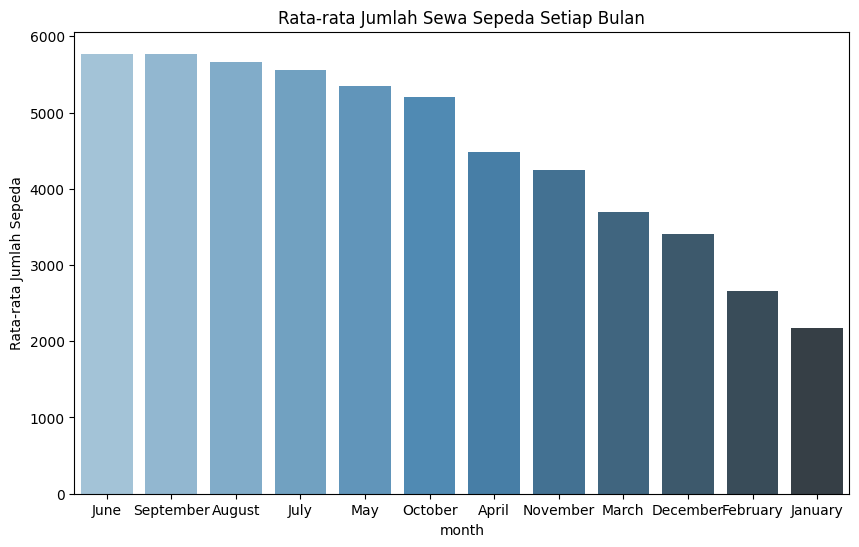

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data = month_data, palette="Blues_d")
plt.title('Rata-rata Jumlah Sewa Sepeda Setiap Bulan')
plt.xlabel('month')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.show()

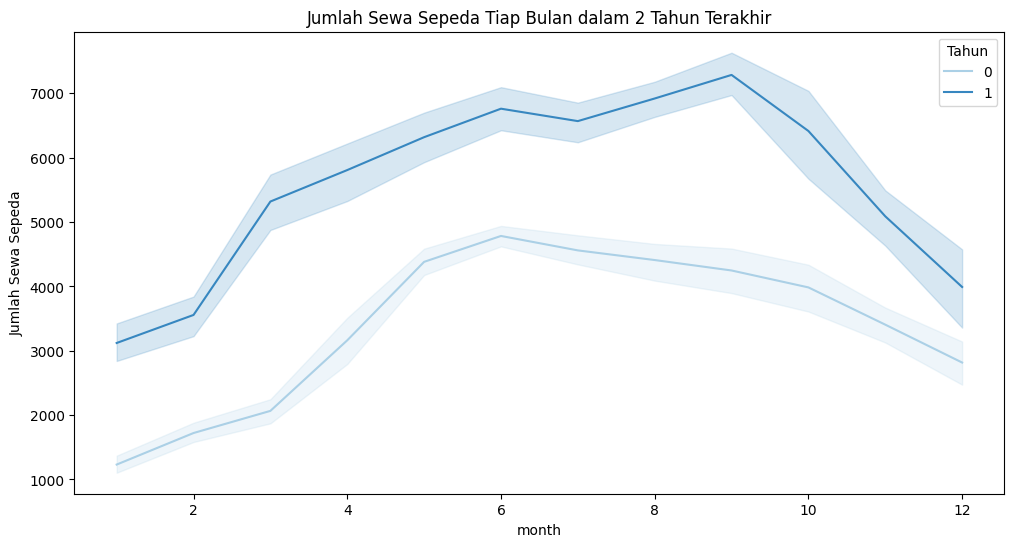

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df, hue='yr', palette='Blues')
plt.title('Jumlah Sewa Sepeda Tiap Bulan dalam 2 Tahun Terakhir')
plt.xlabel('month')
plt.ylabel('Jumlah Sewa Sepeda')
plt.legend(title='Tahun')
plt.show()

## Conclusion

- Conclution pertanyaan 1

Bila ditinjau dari musim (season), permintaan jumlah sewa sepeda mengalami peningkatan yang signifikan pada musim gugur (fall) dan mengalami penurunan pada  musim semi (springer).Bila ditinjau dari cuaca(weathersit), permintaan jumlah sewa sepeda mengalami peningkatan yang signifikan pada cuaca (clear, few clouds, partly cloudy, partly cloudy) dan mengalami penurunan pada cuaca (light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds). Bila ditinjau dari 10 sampel suhu(temp), permintaan jumlah sewa sepeda mengalami peningkatan yang signifikan pada suhu 0,667 dan mengalami penurunan pada shuhu 0,182. Bila ditinjau dari 10 sampel suhu terasa(atemp),  permintaan jumlah sewa sepeda mengalami peningkatan yang signifikan pada suhu 0,70 dan mengalami penurunan pada suhu 0,39.


- Conclution pertanyaan 2

Korelasi antara jumlah sewa sepeda dan suhu menunjukkan pola linear positif, yang berarti semakin tinggi suhu, semakin tinggi jumlah sepeda yang disewa. Ini bisa diartikan bahwa cuaca yang lebih hangat cenderung meningkatkan minat orang untuk menggunakan sepeda.
Korelasi antara jumlah sewa sepeda dan kelembaban menunjukkan pola negatif cenderung lemah yang berarti semakin tinggi kelembaban, semakin rendah jumlah sepeda yang disewa.
Korelasi antara jumlah sewa sepeda dan kecepatan angin menunjukkan pola negatif lemah yang berarti  semakin tinggi kecepatan angin, semakin rendah jumlah sepeda yang disewa.

- Conclution pertanyaan 3

Bila ditinjau dari setiap harinya, jumlah sewa sepeda tidak berpengaruh pada hari. Bila ditinjau dari setiap bulannya, jumlah sewa sepeda sangat meningkat di bulan Juni dan September serta mengalami penurunan di bulan Januari. Bila ditinjau lebih dalam lagi, tingkat jumlah sewa sepeda setiap bulannya pada 2 tahun terakhir memiliki peningkatan yang berbeda.  Pada tahun pertama jumlah sewa sepeda meingkat pada bulan Juni dan mengalami penurunan di bulan Januari. Pada tahun kedua mengalami peningkatakan yang sangat pesat dari pada tahun pertama, jumlah sewa sepeda sangat meningkat pada bulan September dan mengalami penurunan pada bulan Januari.
